In [2]:
import pandas as pd
import numpy as np

In [3]:
from wordcloud import WordCloud, STOPWORDS

In [4]:
import lightgbm

In [5]:
from sklearn.preprocessing import LabelEncoder

In [35]:
from nltk.stem import PorterStemmer

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

In [7]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
from nltk.corpus import stopwords
stopwords=stopwords.words("english")

In [10]:
import re

In [11]:
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv("dataV2.csv")

In [13]:
df=df[['text','choose_one']]

## Feature Selection

In [14]:
vocabLen=[]

In [15]:
tfIdf=TfidfVectorizer(min_df=0.01,stop_words=None,max_df=0.999,ngram_range=(1,3))

In [16]:
X=tfIdf.fit_transform(df['text'])

In [17]:
y=LabelEncoder().fit_transform(df['choose_one'])

In [18]:
vocabLen.append(len(tfIdf.vocabulary_))

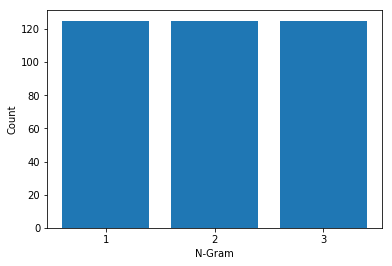

In [19]:
plt.bar([1,2,3],vocabLen)
plt.xticks([1,2,3],[1,2,3])
plt.xlabel("N-Gram")
plt.ylabel("Count")
plt.savefig("plots/TF-IDF-vocabcount.png")
plt.show()

# Performing classification

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y.ravel(),shuffle=True)

In [21]:
def createSummary(y_test,y_pred):
    class0List=np.where(y_test==0)
    class1List=np.where(y_test==1)
    sumDict={}
    sumDict['accuracy']=np.mean(y_test==y_pred)
    sumDict['class0Accuracy']=np.mean(y_test[class0List]==y_pred[class0List])
    sumDict['class1Accuracy']=np.mean(y_test[class1List]==y_pred[class1List])
    sumDict['precision']=precision_score(y_test,y_pred)
    sumDict['recall']=recall_score(y_test,y_pred)
    sumDict['f1-score']=f1_score(y_test,y_pred)
    sumDict['auc']=roc_auc_score(y_test,y_pred)
    sumDict['confuseMatrix']=confusion_matrix(y_test,y_pred)
    print(classification_report(y_test,y_pred,target_names=['class 0','class 1']))
#     print(sumDict)
    return sumDict

In [22]:
nb=BernoulliNB()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)
createSummary(y_test,y_pred)

              precision    recall  f1-score   support

     class 0       0.61      0.39      0.47       207
     class 1       0.85      0.93      0.89       773

   micro avg       0.82      0.82      0.82       980
   macro avg       0.73      0.66      0.68       980
weighted avg       0.80      0.82      0.80       980



{'accuracy': 0.8173469387755102,
 'class0Accuracy': 0.3864734299516908,
 'class1Accuracy': 0.9327296248382924,
 'precision': 0.8502358490566038,
 'recall': 0.9327296248382924,
 'f1-score': 0.8895743368291178,
 'auc': 0.6596015273949916,
 'confuseMatrix': array([[ 80, 127],
        [ 52, 721]])}

In [23]:
X_train.t

AttributeError: t not found

In [ ]:
gs=GaussianNB()
gs.fit(X_train.toarray(),y_train)
y_pred=gs.predict(X_test)
createSummary(y_test,y_pred)

In [ ]:
mlp=MLPClassifier(hidden_layer_sizes=200)
mlp.fit(X_train,y_train)
y_pred=mlp.predict(X_test)
createSummary(y_test,y_pred)

In [ ]:
decTree=DecisionTreeClassifier()
decTree.fit(X_train,y_train)
y_pred=decTree.predict(X_test)
createSummary(y_test,y_pred)

In [ ]:
svcModel=SVC()
svcModel.fit(X_train,y_train)
y_pred=svcModel.predict(X_test)
createSummary(y_test,y_pred)

In [24]:
LogReg=LogisticRegression()
LogReg.fit(X_train,y_train)
y_pred=LogReg.predict(X_test)
createSummary(y_test,y_pred)

              precision    recall  f1-score   support

     class 0       0.67      0.33      0.45       207
     class 1       0.84      0.96      0.90       773

   micro avg       0.82      0.82      0.82       980
   macro avg       0.76      0.64      0.67       980
weighted avg       0.81      0.82      0.80       980



/home/silverstar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'accuracy': 0.8244897959183674,
 'class0Accuracy': 0.3333333333333333,
 'class1Accuracy': 0.9560155239327296,
 'precision': 0.8426453819840365,
 'recall': 0.9560155239327296,
 'f1-score': 0.8957575757575759,
 'auc': 0.6446744286330315,
 'confuseMatrix': array([[ 69, 138],
        [ 34, 739]])}

In [25]:
RanFor=RandomForestClassifier(class_weight={0:45,1:1})
RanFor.fit(X_train,y_train)
y_pred=RanFor.predict(X_test)
createSummary(y_test,y_pred)

/home/silverstar/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

     class 0       0.44      0.48      0.46       207
     class 1       0.86      0.84      0.85       773

   micro avg       0.76      0.76      0.76       980
   macro avg       0.65      0.66      0.65       980
weighted avg       0.77      0.76      0.77       980



{'accuracy': 0.7612244897959184,
 'class0Accuracy': 0.4830917874396135,
 'class1Accuracy': 0.8357050452781372,
 'precision': 0.8579017264276229,
 'recall': 0.8357050452781372,
 'f1-score': 0.8466579292267364,
 'auc': 0.6593984163588753,
 'confuseMatrix': array([[100, 107],
        [127, 646]])}

In [26]:
linSvc=LinearSVC()
linSvc.fit(X_train,y_train)
y_pred=linSvc.predict(X_test)
createSummary(y_test,y_pred)

              precision    recall  f1-score   support

     class 0       0.67      0.40      0.50       207
     class 1       0.85      0.95      0.90       773

   micro avg       0.83      0.83      0.83       980
   macro avg       0.76      0.67      0.70       980
weighted avg       0.81      0.83      0.81       980



{'accuracy': 0.8306122448979592,
 'class0Accuracy': 0.3961352657004831,
 'class1Accuracy': 0.9469598965071151,
 'precision': 0.8541423570595099,
 'recall': 0.9469598965071151,
 'f1-score': 0.898159509202454,
 'auc': 0.6715475811037991,
 'confuseMatrix': array([[ 82, 125],
        [ 41, 732]])}

In [27]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}
X_test=X_test.astype("float")
X_train=X_train.astype("float")
y_train=y_train.astype("float")
y_test=y_test.astype("float")

train_data = lightgbm.Dataset(X_train, label=y_train)
test_data = lightgbm.Dataset(X_test, label=y_test)
model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)
#

[1]	valid_0's auc: 0.702302
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.730862
[3]	valid_0's auc: 0.733968
[4]	valid_0's auc: 0.731525
[5]	valid_0's auc: 0.736165
[6]	valid_0's auc: 0.740877
[7]	valid_0's auc: 0.746205
[8]	valid_0's auc: 0.745711
[9]	valid_0's auc: 0.750195
[10]	valid_0's auc: 0.752873
[11]	valid_0's auc: 0.755264
[12]	valid_0's auc: 0.752317
[13]	valid_0's auc: 0.750517
[14]	valid_0's auc: 0.751136
[15]	valid_0's auc: 0.751411
[16]	valid_0's auc: 0.749686
[17]	valid_0's auc: 0.751273
[18]	valid_0's auc: 0.751439
[19]	valid_0's auc: 0.750383
[20]	valid_0's auc: 0.750252
[21]	valid_0's auc: 0.752383
[22]	valid_0's auc: 0.75462
[23]	valid_0's auc: 0.75782
[24]	valid_0's auc: 0.76167
[25]	valid_0's auc: 0.764085
[26]	valid_0's auc: 0.764322
[27]	valid_0's auc: 0.766497
[28]	valid_0's auc: 0.769635
[29]	valid_0's auc: 0.769878
[30]	valid_0's auc: 0.770444
[31]	valid_0's auc: 0.770613
[32]	valid_0's auc: 0.7706
[33]	valid_0's auc: 0.7

In [28]:
y_pred=model.predict(X_test)

/home/silverstar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00       207
     class 1       0.79      1.00      0.88       773

   micro avg       0.79      0.79      0.79       980
   macro avg       0.39      0.50      0.44       980
weighted avg       0.62      0.79      0.70       980

              precision    recall  f1-score   support

     class 0       0.50      0.00      0.01       207
     class 1       0.79      1.00      0.88       773

   micro avg       0.79      0.79      0.79       980
   macro avg       0.64      0.50      0.45       980
weighted avg       0.73      0.79      0.70       980

              precision    recall  f1-score   support

     class 0       0.57      0.02      0.04       207
     class 1       0.79      1.00      0.88       773

   micro avg       0.79      0.79      0.79       980
   macro avg       0.68      0.51      0.46       980
weighted avg       0.74      0.79      0.70       980

              preci

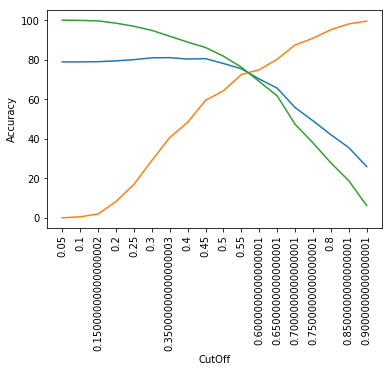

In [29]:
accList=[]
class0List=[]
class1List=[]
for i in np.arange(0.05,0.95,0.05):
    y_pred_1=np.where(y_pred>i,1,0)
    sumDict=createSummary(y_test,y_pred_1)
    accList.append(sumDict['accuracy']*100)
    class0List.append(sumDict['class0Accuracy']*100)
    class1List.append(sumDict['class1Accuracy']*100)
plt.plot(accList)
plt.plot(class0List)
plt.plot(class1List)
plt.xlabel("CutOff")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0,18,1),np.arange(0.05,0.95,0.05),rotation="vertical")
plt.savefig("plots/TFIDFLightGBMCutoff_ngrams_3.png")
plt.show()

In [30]:
y_pred_1=np.where(y_pred>0.55,1,0)
createSummary(y_test,y_pred_1)

              precision    recall  f1-score   support

     class 0       0.45      0.72      0.55       207
     class 1       0.91      0.76      0.83       773

   micro avg       0.75      0.75      0.75       980
   macro avg       0.68      0.74      0.69       980
weighted avg       0.81      0.75      0.77       980



{'accuracy': 0.7540816326530613,
 'class0Accuracy': 0.7246376811594203,
 'class1Accuracy': 0.7619663648124192,
 'precision': 0.9117647058823529,
 'recall': 0.7619663648124192,
 'f1-score': 0.8301620859760395,
 'auc': 0.7433020229859196,
 'confuseMatrix': array([[150,  57],
        [184, 589]])}

In [38]:
porter=PorterStemmer()
def preprocessing(a_tweet):
    cleanTweet=[]
    a_tweet=a_tweet.replace("&amp;",'&')
    a_tweet=a_tweet.replace(".","")
    a_tweet=a_tweet.lower()
    a_tweet=a_tweet.split(" ")
    for word in a_tweet:
        word=word.strip()

        valid=re.search(pattern=r"[^A-Za-z-&<>]",string=word)==None
        if(word!="" and valid==True and word not in stopwords):
            word=porter.stem(word)
            cleanTweet.append(word)
    if(len(cleanTweet)==0):
        return None
    else:
        return " ".join(cleanTweet)
    return " ".join(cleanTweet)

In [54]:
brands={}
brands['t-mobile']=['t-mobile','tmobile','tmobi']
brands['verizon']=['verizon','veryzon']
brands['at&t']=['att','at&t',]

def generatePrediction(tweet,brand):
    tweet=tweet.replace("&amp;","&")
    tweet=tweet.replace("amp;",'&')
    tweet=preprocessing(tweet)
    for key,value in brands.items():
        if(key==brand):
            replaceWord=" <bb> "
        else:
            replaceWord=" <aa> "
            
        for name in value:
            tweet=tweet.replace(name,replaceWord)
            
    fect=tfIdf.transform([tweet])
    fect=model.predict(fect)
    if(fect<0.55):
        return "Churny"
    else:
        return "Non-Churny"

In [55]:
generatePrediction("Tired of Verizon , I hate it . I am leaving it","Verizon")

'Churny'

In [50]:
model.predict(x)

array([0.43709043])